## TSF GRIP Task #1 By Dewashya M. Dubey
Data Science & Business Analytics Intern 
(August 2021)

# **Prediction using Supervised ML**
*  **Predict the percentage of a student based on the no. of study hours.** 
*  This is a ***simple linear regression*** task as it involves just ***2 variables***.
*  I used **Python** as my tool 
*  Data can be found at **http://bit.ly/w-data**
*  **Goal: What will be predicting score if a student studies for 9.25 hrs/ day?** 

#To import all the libraries required for this task

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#Importing Data

In [3]:
Url = "http://bit.ly/w-data"
data = pd.read_csv(Url)
print(data.head(10)) #to check if its the correct data

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


Now that we know that it is the correct data we shall start. 

#Data Processing

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.shape

(25, 2)

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

#To Find missing values in data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*   Here as you can see, There are no missing values present in the data set.
*   Independent variable are of float data type where as dependent variable are of integer data type.

# Descriptive statistics

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




* describe() function tell us five number summary that is min, max, quartile,mean, count. 



#Finding Missing values in data set, if any

In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64



*   No Missing values in dataset



#Correlation

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000




*  Based on the output, we observed that there is high correlation between Study hours and marks scored by the student




#Data Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

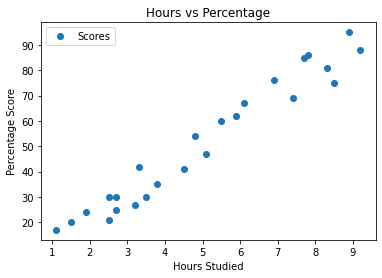

In [31]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [28]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [26]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [25]:
regressor.score(x_train,y_train)

0.9515510725211553

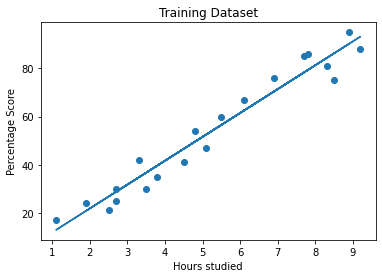

0.9515510725211553

In [39]:
plt.scatter(x_train,y_train)
plt.title('Training Dataset')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

regressor.score(x_train,y_train)

#Visualizing testing data

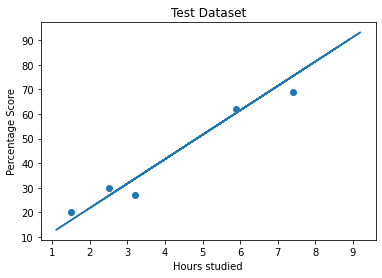

0.9454906892105354

In [40]:
plt.scatter(x_test,y_test)
plt.title('Test Dataset')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()
regressor.score(x_test,y_test)

In [41]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


#Plotting the regression line

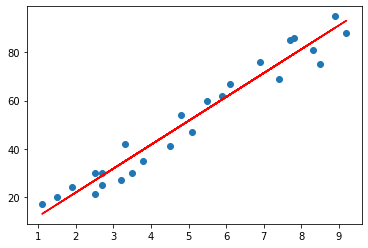

In [45]:
best_fitline = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, best_fitline, color = 'Red');
plt.show()

#Values of Intercept and Coefficient

In [46]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 2.018160041434662
Coefficient is : [9.91065648]




*  If a student studies for one more hour than there is an increase of 9.91% in Total score



### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [49]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#Model Evaluation

In [62]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

MAE: 4.183859899002982


In [63]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

R-Square: 0.9454906892105354


#Testing with your own data

In [65]:

hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


# **Q. What will be predicted score if a student studies for 9.25 hrs/ day?**

In [64]:
hours = float(input("Enter study hours:"))
hours = [[hours]]
regressor.predict(hours)

Enter study hours:9.25


array([93.69173249])

# Conclusion:
Here i conclude that if a ***Student studies*** for **9.25 hours/day** then the predicted score will be **93.69%**

**Thank You**